In [1]:
import pandas as pd 
import xml.etree.ElementTree as et 

In [2]:
xtree = et.parse("/content/drive/MyDrive/Colab Notebooks/books/books.xml")
xroot = xtree.getroot()

In [3]:
df_cols = ["author", "title", "genre", "price", "publish_date", "description"]
rows = []

for node in xroot:
  s_author = node.find("author").text if node is not None else None
  s_title = node.find("title").text if node is not None else None
  s_genre = node.find("genre").text if node is not None else None
  s_price = node.find("price").text if node is not None else None
  s_publish_date = node.find("publish_date").text if node is not None else None
  s_description = node.find("description").text if node is not None else None
    
  rows.append({"author": s_author, "title": s_title, "genre": s_genre, "price": s_price, "publish_date": s_publish_date, "description": s_description})

out_df = pd.DataFrame(rows, columns = df_cols)

In [4]:
out_df["price"] = pd.to_numeric(out_df["price"])

In [5]:
name, surname = [], []
for _ in out_df['author']:
  name1, surname1 = _.split(', ')
  name.append(name1)
  surname.append(surname1)
out_df['author_name'] = pd.Series(name)
out_df['author_surname'] = pd.Series(surname)

In [7]:
out_df = out_df.sort_values(by=['price'])

In [10]:
out_df['price'] =pd.to_numeric(out_df['price'])

In [12]:
out_df

author  ... author_surname
5       Randall, Cynthia  ...        Cynthia
6         Thurman, Paula  ...          Paula
7          Knorr, Stefan  ...         Stefan
1             Ralls, Kim  ...            Kim
2            Corets, Eva  ...            Eva
3            Corets, Eva  ...            Eva
4            Corets, Eva  ...            Eva
8           Kress, Peter  ...          Peter
9           O'Brien, Tim  ...            Tim
10          O'Brien, Tim  ...            Tim
0   Gambardella, Matthew  ...        Matthew
11           Galos, Mike  ...           Mike

[12 rows x 8 columns]

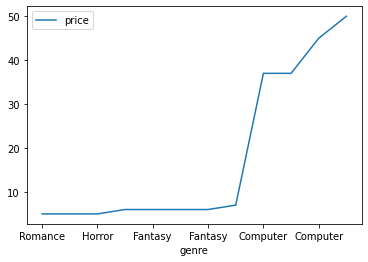

In [14]:
p = out_df.plot(x='genre', y='price')
p